In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from src.cade_outliers import CADEOutliers

In [2]:
cade = CADEOutliers(RandomForestClassifier(max_depth=3), 'grid', 1.)

In [3]:
X = np.vstack([np.random.randn(5000, 2), 10 + np.random.randn(20, 2)])

In [4]:
A = cade.outliers_ranking(X)

In [5]:
anomalies = X[np.argsort(-A)][:100]

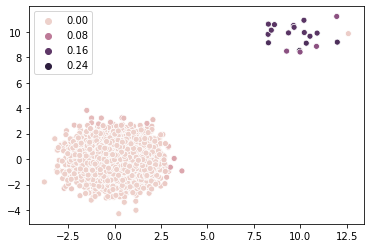

In [6]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=A)